In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [9]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

Data types in 'indu' dataframe:
Time       datetime64[ns]
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
dtype: object

Data types in 'cons' dataframe:
Time        datetime64[ns]
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
cons_Q4            float64
cons_Q5            float64
cons_Q6            float64
cons_Q7            float64
cons_Q8            float64
cons_Q9            float64
cons_Q10           float64
cons_Q11           float64
cons_Q12           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
Time       datetime64[ns]
dtype: object
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
con

In [10]:
#Using the period 1990-2015 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [11]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
99  2014-10-01  512.7
100 2015-01-01  495.9
101 2015-04-01  513.5
102 2015-07-01  505.9
103 2015-10-01  521.1

[104 rows x 2 columns]
      cons_Q1    cons_Q2    cons_Q3    cons_Q4    cons_Q5    cons_Q6  \
0   -3.166667   3.333333  -9.333333  -4.500000  -5.333333  -5.666667   
1   -0.666667   3.333333 -13.833333  -6.833333  -8.833333  -6.666667   
2   -0.500000   3.833333 -21.666667 -14.666667 -11.500000  -7.500000   
3   -2.666667   1.833333 -16.833333 -11.000000 -14.833333  -8.666667   
4   -1.666667   6.500000   2.000000  -1.000000 -23.666667 -15.833333   
..        ...        ...        ...        ...        ...        ...   
99   4.400000  13.666667  11.500000  14.666667  -5.433333  19.133333   
100  6.033333  14.300000  15.333333  19.933333 -17.733333  10.700000   
101  5.133333  15.133333  20.133333  23.266667  -8.433333  20.06

In [12]:
#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train, cons_train], axis=1)

#Remove the Time column
exog.drop('Time', axis=1, inplace=True)

#Fit auto_arima function to the data
arimax_model = auto_arima(gdp_train['Value'], exogenous=exog, 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, 
                          seasonal=False,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the model
arimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=709.027, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=846.664, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.146, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=783.752, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=849.055, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=711.001, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=710.032, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=774.101, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=754.250, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=704.499, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=674.007, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=674.443, Time=0.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=654.301, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=688.540, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=682.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -319.150
Date:                Sun, 07 Apr 2024   AIC                            654.301
Time:                        16:06:28   BIC                            675.378
Sample:                             0   HQIC                           662.838
                                - 104                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.4251      2.032      5.623      0.000       7.443      15.407
ar.L1         -1.0438      0.031    -34.080      0.000      -1.104      -0.984
ar.L2         -1.0226      0.042    -24.308      0.000      -1.105      -0.940
ar.L3         -0.9769      0.030    -32.893      0.000      -1.035      -0.919
ma.L1          0.9679      0.104      9.266      0.000       0.763       1.173
ma.L2          0.8984      0.125      7.204      0.000       0.654       1.143
ma.L3          0.7047      0.096      7.356      0.000       0.517       0.892
sigma2        26.3177      3.228      8.154      0.000      19.991      32.644
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.69
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.64
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

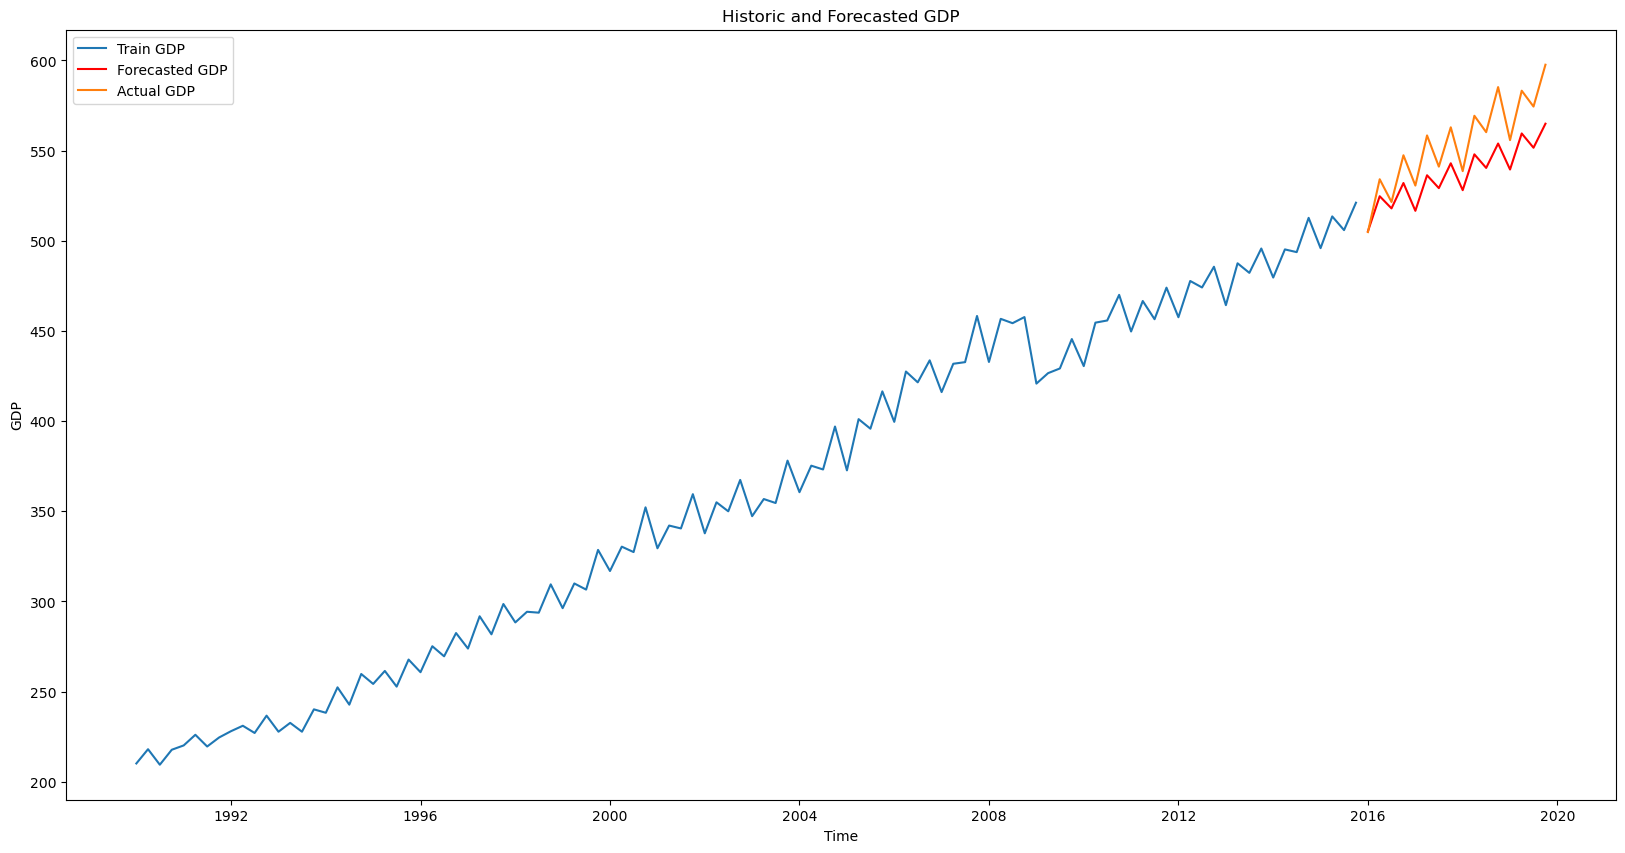

In [13]:
# Forecast 16 quarters ahead based on test indu and cons
exog_test = pd.concat([indu_test, cons_test], axis=1)

# Remove the Time column
exog_test.drop('Time', axis=1, inplace=True)

# Forecast the GDP values
forecast = arimax_model.predict(n_periods=16, exogenous=exog_test)

# Get the forecasted values
forecast_values = forecast.tolist()

# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(gdp_test['Time'], forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [14]:
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

#The RMSE is 19. This is a good result, as the GDP is a very volatile variable.

The RMSE is 19.23479688592677
